In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras import regularizers
import numpy as np

In [2]:
learning_rate = 0.001
epochs = 30 
batch_size = 120

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 225
x_testv /= 225 # tenía un error 

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

En el script del prof, podemos ver como llama primero los datos para ver como es que están predispuestos y así comenzar a trabjar con ellos

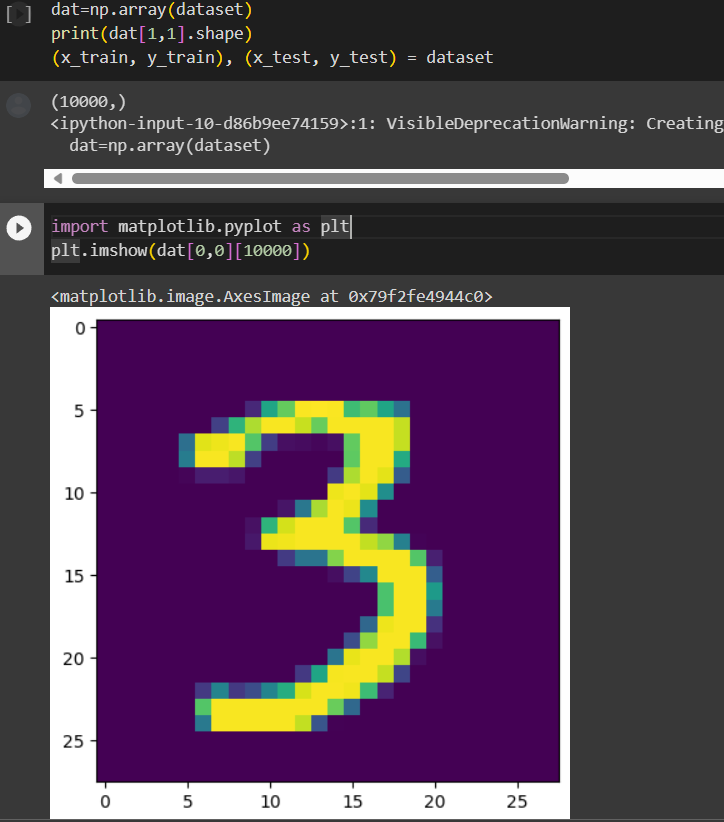

In [3]:
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])


In [5]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/30
500/500 [==============================] - 4s 7ms/step - loss: 2.2610 - accuracy: 0.2257 - val_loss: 2.1920 - val_accuracy: 0.3620
Epoch 2/30
500/500 [==============================] - 3s 7ms/step - loss: 2.1436 - accuracy: 0.4186 - val_loss: 2.0894 - val_accuracy: 0.4992
Epoch 3/30
500/500 [==============================] - 3s 6ms/step - loss: 2.0460 - accuracy: 0.5365 - val_loss: 1.9923 - val_accuracy: 0.5884
Epoch 4/30
500/500 [==============================] - 3s 7ms/step - loss: 1.9534 - accuracy: 0.6073 - val_loss: 1.9005 - val_accuracy: 0.6511
Epoch 5/30
500/500 [==============================] - 3s 7ms/step - loss: 1.8656 - accuracy: 0.6561 - val_loss: 1.8135 - val_accuracy: 0.6802
Epoch 6/30
500/500 [==============================] - 3s 7ms/step - loss: 1.7823 - accuracy: 0.6821 - val_loss: 1.7308 - val_accuracy: 0.7214
Epoch 7/30
500/500 [==============================] - 4s 7ms/step - loss: 1.7034 - accuracy: 0.7101 - val_loss: 1.6527 - val_accuracy: 0.7213
Epoch 

# Ahora recreamos la red como la básica que teníamos:

In [9]:
learning_rate = 0.07 # La original la corrí con los siguientes valores
epochs = 15 
batch_size = 10

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 225
x_testv /= 225

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])
inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")
# La primer red me dió un 72% de efectividad en 135,5 s

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                23550     
                                                                 
 dense_7 (Dense)             (None, 10)                310       
                                                                 
Total params: 23860 (93.20 KB)
Trainable params: 23860 (93.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2049 - accuracy: 0.7344 - val_loss: 0.1320 - val_accuracy: 0.8521
Epoch 2/15
6000/6000 [==============================] - 11s 2ms/step - loss: 0.1111 - accuracy: 0.8668 - val_loss: 0.0915 - val_accuracy: 0.8897
Epoch 3/15
6000/6000 [==============================] - 11s 2ms/step - loss: 0.0850 - accuracy: 0.8914 - val_loss: 0.0750 - 

NameError: name 'test_acc' is not defined

In [11]:
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")

Efectividad del modelo:  93.65 %
Tiempo entrenando:  162.0917 s


# Implementaciones para la RNA Secuencial.
### 1er Experimento: 
   - Aumentamos otra capa de neuronas ocultas (30).
   - Disminuimos el tamaño del LearningRate.
   - También se aumentó el tamaño del minibatch.

In [8]:
import time

In [12]:
learning_rate = 0.001
epochs = 20
batch_size = 70

dataset = mnist.load_data()
(x_train, y_train), (x_test, y_test) = dataset

x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv /= 225
x_testv /= 225

num_classes = 10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)
 
model = Sequential()
model.add(Dense(30, activation='sigmoid', input_shape=(784,)))
model.add(Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=learning_rate), metrics=['accuracy'])

inicio = time.time()
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )
fin = time.time()
test_loss, test_acc = model.evaluate(x_testv, y_testc, verbose=0)
print("Efectividad del modelo: ", round((test_acc * 100), 2), "%")
print("Tiempo entrenando: ",round(fin-inicio, 4),"s")


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                23550     
                                                                 
 dense_9 (Dense)             (None, 20)                620       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
Total params: 24380 (95.23 KB)
Trainable params: 24380 (95.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
858/858 [==============================] - 3s 2ms/step - loss: 0.6859 - accuracy: 0.1124 - val_loss: 0.6366 - val_accuracy: 0.1135
Epoch 2/20
858/858 [==============================] - 2s 2ms/step - loss: 0.5969 - accuracy: 0.1124 - val_loss: 0.5612 - val_accuracy: 0.113